# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?


Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.</span>

## Termalization

 A problem arises during the initial setup: while we can choose a crystalline configuration for positions, what about the velocities? The easiest solution is to generate them randomly according to the Maxwell-Boltzmann distribution. This occurs when the input parameter `restart` is set to `0`: the program loads the crystalline configuration saved in `INPUT/CONFIG/config.xyz` and extracts velocities following the Maxwell-Boltzmann distribution (while also correcting an undesired drift effect).

However, even this initialization doesn't guarantee a perfect equilibrium in the system: the temperature doesn't remain constant at the desired value but tends to drift towards another value, around which it stabilizes.

This might be due to the fact that, although the code extracts velocities according to a Maxwellian distribution, subsequent collisions redistribute kinetic energy differently. Indeed, by definition, in the microcanonical ensemble, the temperature isn't fixed.

By adjusting the initial temperature so that the stabilization value matches the desired one, it's still possible to save positions and velocities for later use in subsequent simulations.

By monitoring the temperature, it's observed that in the initial stages of the simulation, there is a sharp decrease for the cases of the liquid and solid phases, whereas in the gaseous phase, the opposite behavior is observed (an increase). The explanation for this phenomenon is that we are working with the total energy of the system $E_{tot}$ fixed: an increase in the potential energy (which is negative) results in a decrease in kinetic energy. Given the close relationship between kinetic energy and temperature $K = \frac{3}{2}N k_B T$, a decrease in the former directly affects the latter. To operate under the required thermodynamic conditions (see the beginning of the report), I executed the code multiple times to understand the necessary input temperatures, enabling me to work within the desired context. In particular, I found that

$$ \begin{cases}
  T_{gas} = 0.95 \\
  T_{liquid} = 1.9864  \\
  T_{solid} = 1.542
\end{cases}$$

I monitored the instantaneous temperature values for each step (using blocks $4\cdot 10^4$ of 1 MD step for the solid and liquid phases and gaseous phase, we observe that the latter is slower to reach equilibrium due to the rarer interactions between particles).

Below are the thermalizations for the three phases. 

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

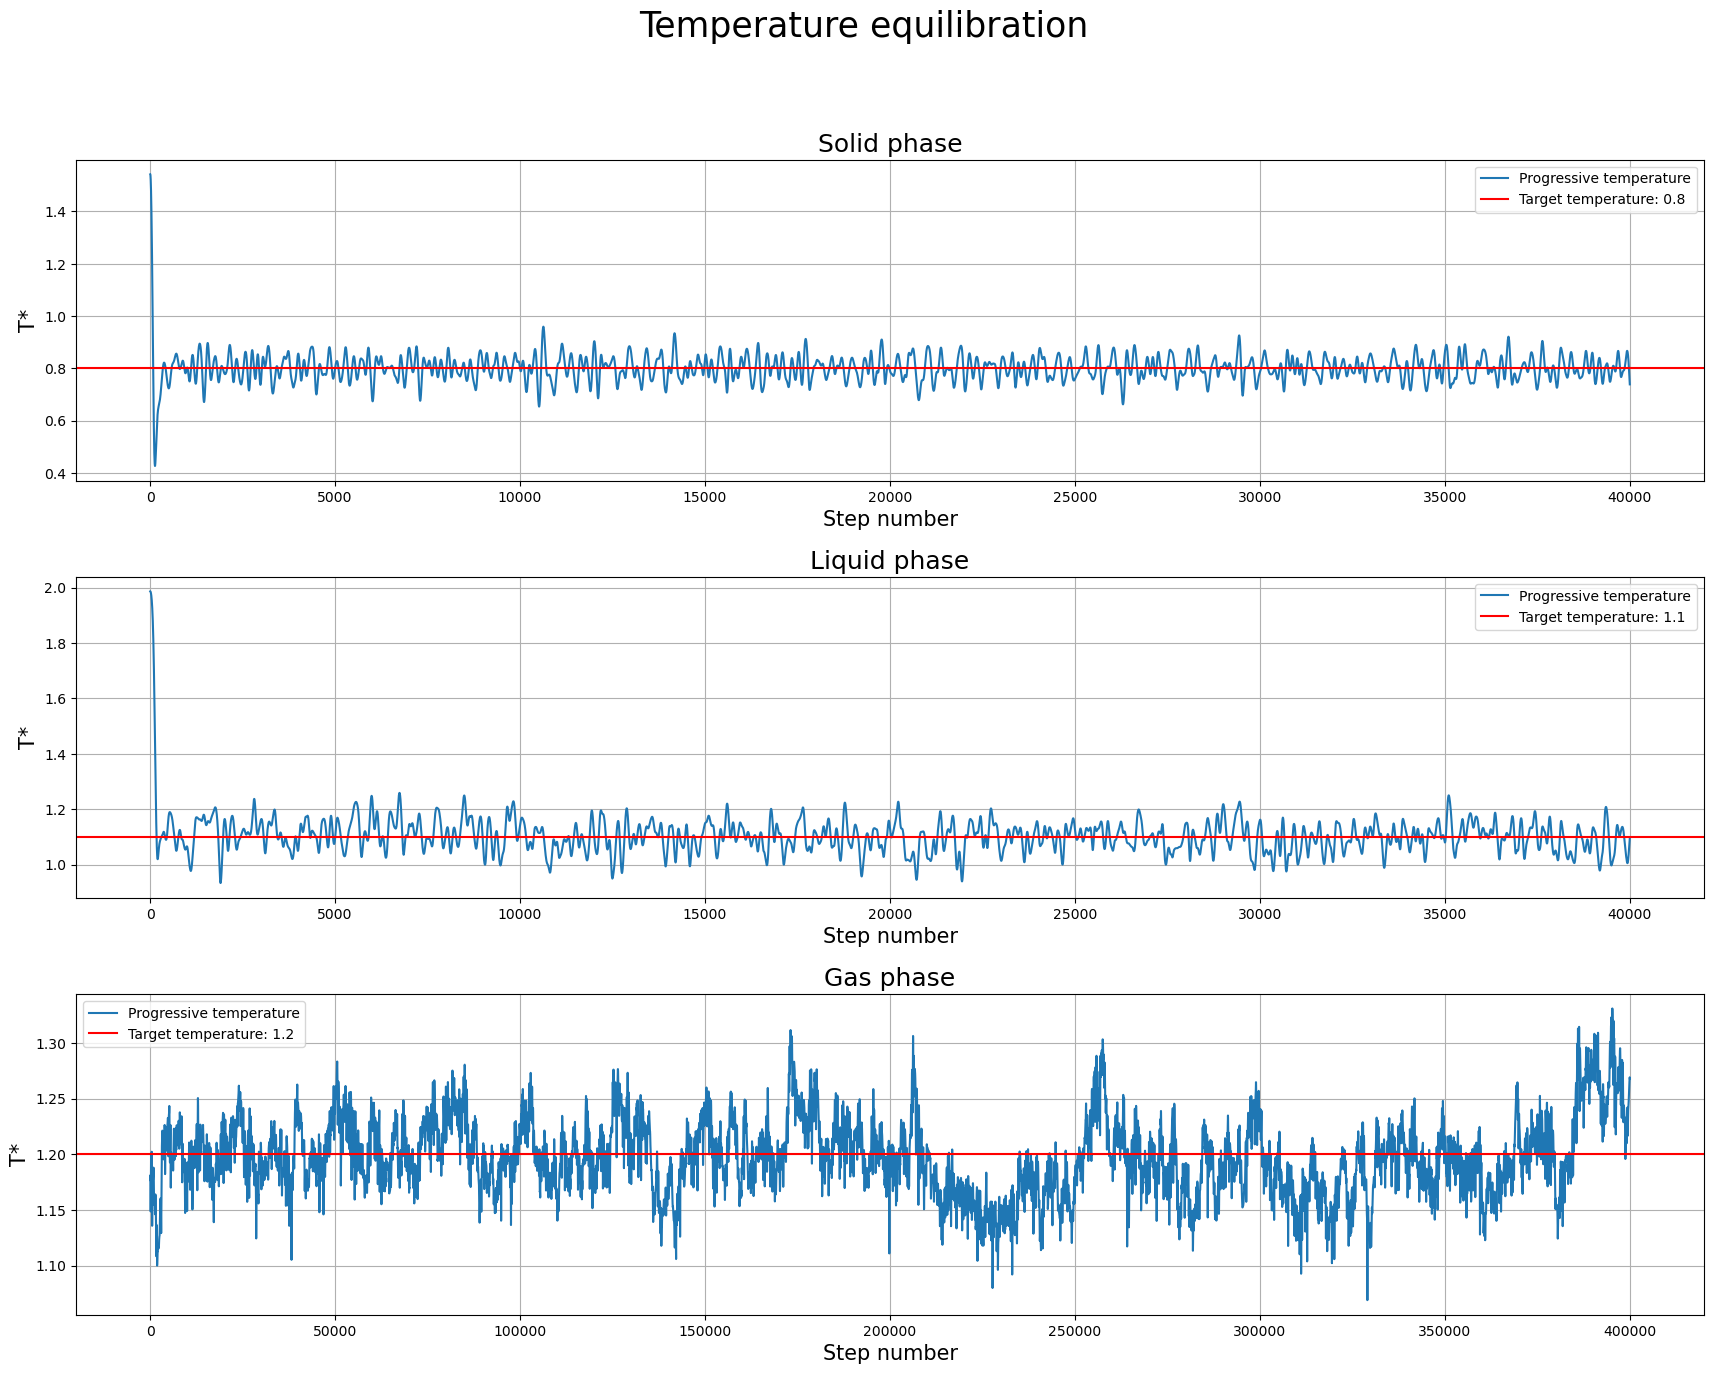

In [ ]:
npart = 108

N = [40000,40000,400000]

phases = ["Solid","Liquid","Gas"]
titles = ["Solid phase", "Liquid phase", "Gas phase"]
Teq = [0.8, 1.1, 1.2]

plt.figure(figsize=(21,15))
plt.suptitle("Temperature equilibration", fontsize = 25)


for i in range(0,3):

    plt.subplot(3,1,i+1)
    x = np.arange(N[i])+1    # Number of blocks
    aveT = np.loadtxt("../DATA/"+phases[i]+"/Termal/temperature.dat", usecols=(1),skiprows=1, unpack='true')
    plt.plot(x, aveT, marker=None, label="Progressive temperature")
    plt.title(titles[i], fontsize = 18)
    plt.ylabel('T*', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.axhline(y=Teq[i], color ="r", label = "Target temperature: "+str(Teq[i]))
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.3)
plt.show()

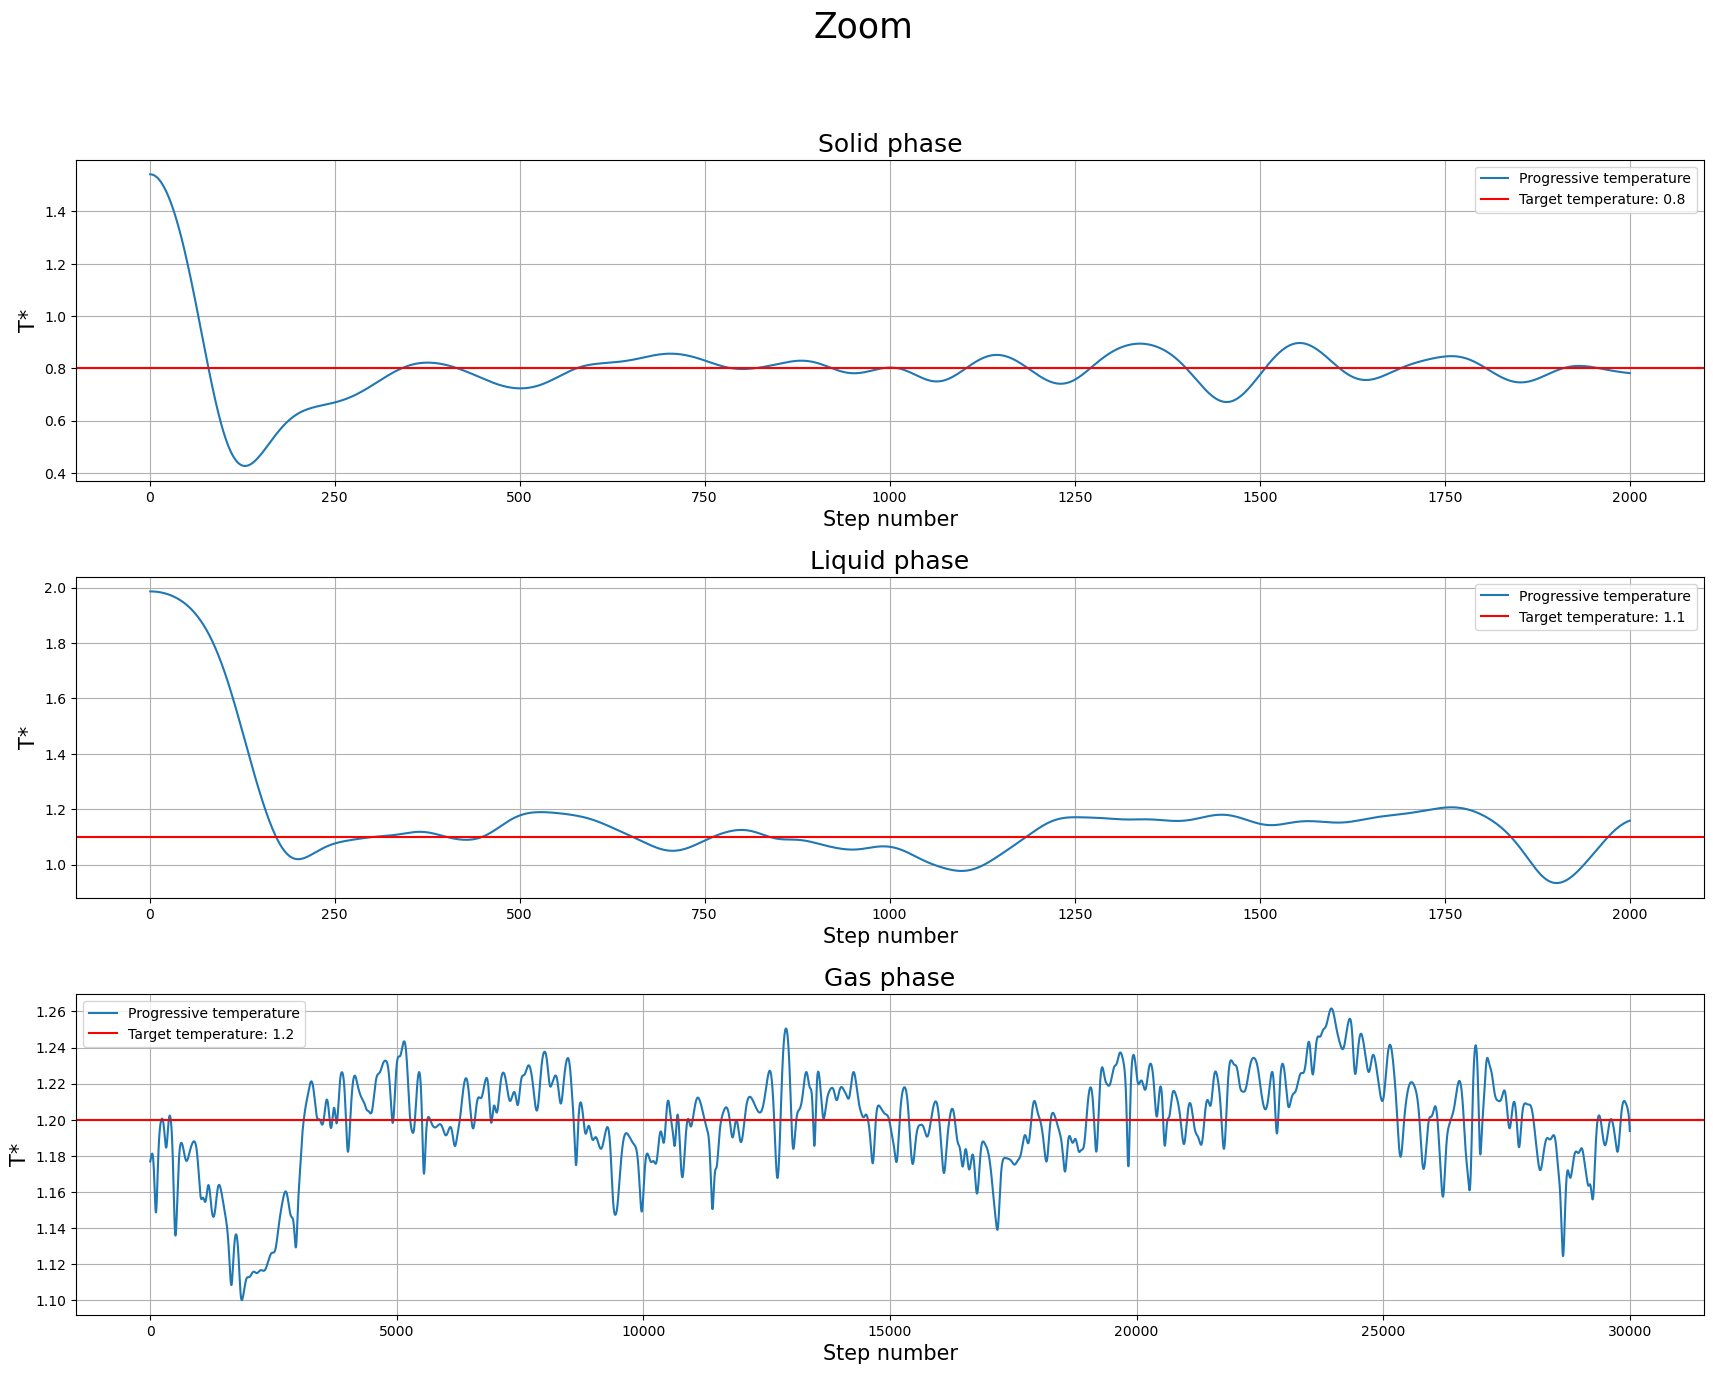

In [21]:
#zoom on the first 10k steps
plt.figure(figsize=(21,15))
plt.suptitle("Zoom", fontsize = 25)
N = [2000,2000,30000]
titles = ["Solid phase", "Liquid phase", "Gas phase"]
for i in range(0,3):

    plt.subplot(3,1,i+1)
    x = np.arange(N[i])+1    # Number of blocks
    aveT = np.loadtxt("../DATA/"+phases[i]+"/Termal/temperature.dat", usecols=(1),skiprows=1, unpack='true')
    plt.plot(x, aveT[:N[i]], marker=None, label="Progressive temperature")
    plt.title(titles[i], fontsize = 18)
    plt.ylabel('T*', fontsize = 15)
    plt.xlabel('Step number', fontsize = 15)
    plt.axhline(y=Teq[i], color ="r", label = "Target temperature: "+str(Teq[i]))
    plt.grid(True)
    plt.legend()
    plt.subplots_adjust(hspace=0.3)

from these graph we can deduce that that termalization ends roughly after $N_\alpha$ steps where:

$$ N_\alpha = 
\begin{cases}
    400 \quad \text{$\alpha$ = solid} \\
    400 \quad \text{$\alpha$ = liquid} \\
    5000 \quad \text{$\alpha$ = gas}
\end{cases}$$

## Graphs of Progressive Averages with Uncertainties

 Below are the graphs (in reduced units) showing the progressive averages with respective uncertainties as a function of the number of blocks for:

- Kinetic energy per particle $\frac{K^*}{N}$,
- Potential energy per particle $\frac{U^*}{N}$,
- Total internal energy per particle $\frac{E^*}{N}$,
- Pressure $P^*$,
- Temperature $T^*$

with each block consisting of 2000 steps to reduce the corre;ation between one measurement and the one after it.
For temperature,i also included the average for each block, allowing visual verification that the previously performed equilibration was preserved.

In [22]:
npart = 108

N = 50
x = np.arange(N)+1    # uso l'ordinamento da 1 a N

th_var = ["kinetic_energy", "potential_energy", "total_energy", "pressure", "temperature"]
labels = [  "Kinetic en.\n(progr. average)",
            "Potential en.\n(progr. average)",
            "Total en.\n(progr. average)",
            "Pressure\n(progr. average)", 
            "Temperature\n(block average)",
            "Temperature\n(progr. average)"]
labels2 = [  "Kinetic en.\n(block average)",
            "Potential en.\n(block average)",
            "Total en.\n(block average)",
            "Pressure\n(block average)", 
            "Temperature\n(block average)",
            "Temperature\n(block average)"]
titles = [  "Kinetic energy",
            "Potential energy",
            "Total energy",
            "Pressure", 
            "Temperature",
            "Temperature"]
ylabels = ["K*/N", "U*/N", "E*/N", "p*", "T*", "T*"]
colors = ["red", "orange", "gold", "green", "blue", "purple"]

## Gaseos State

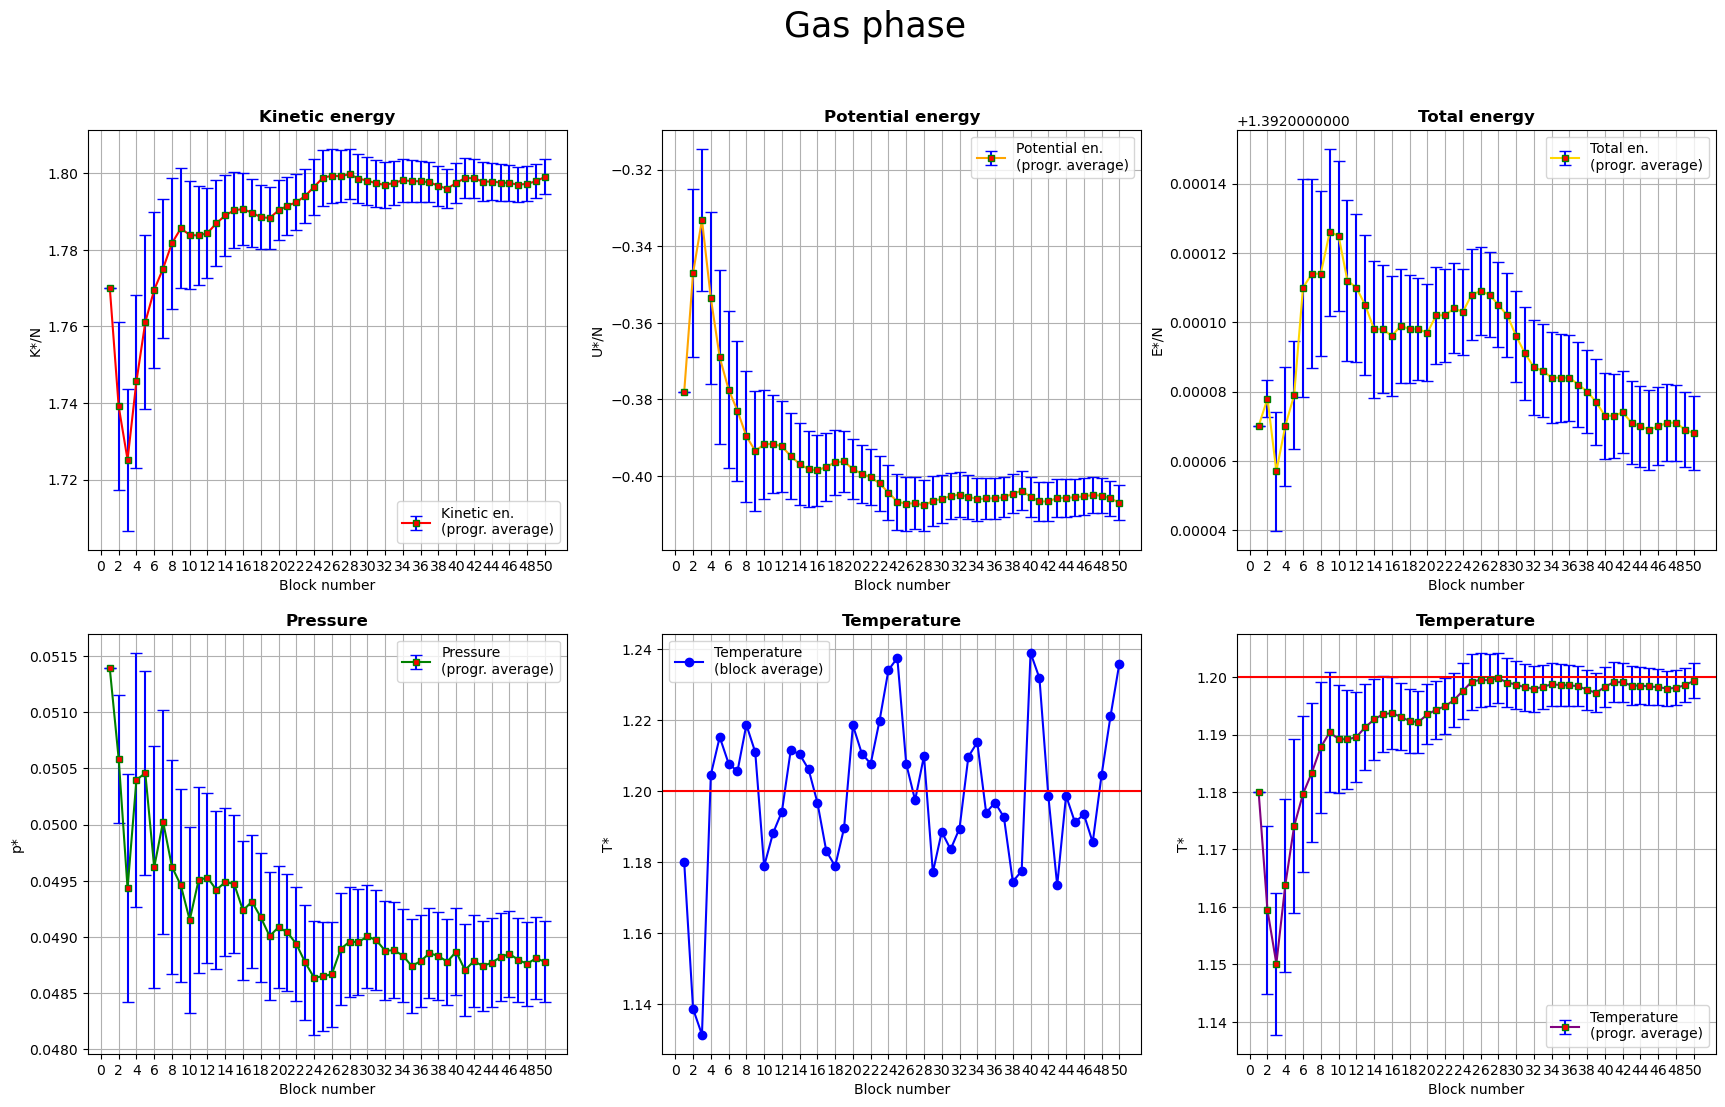

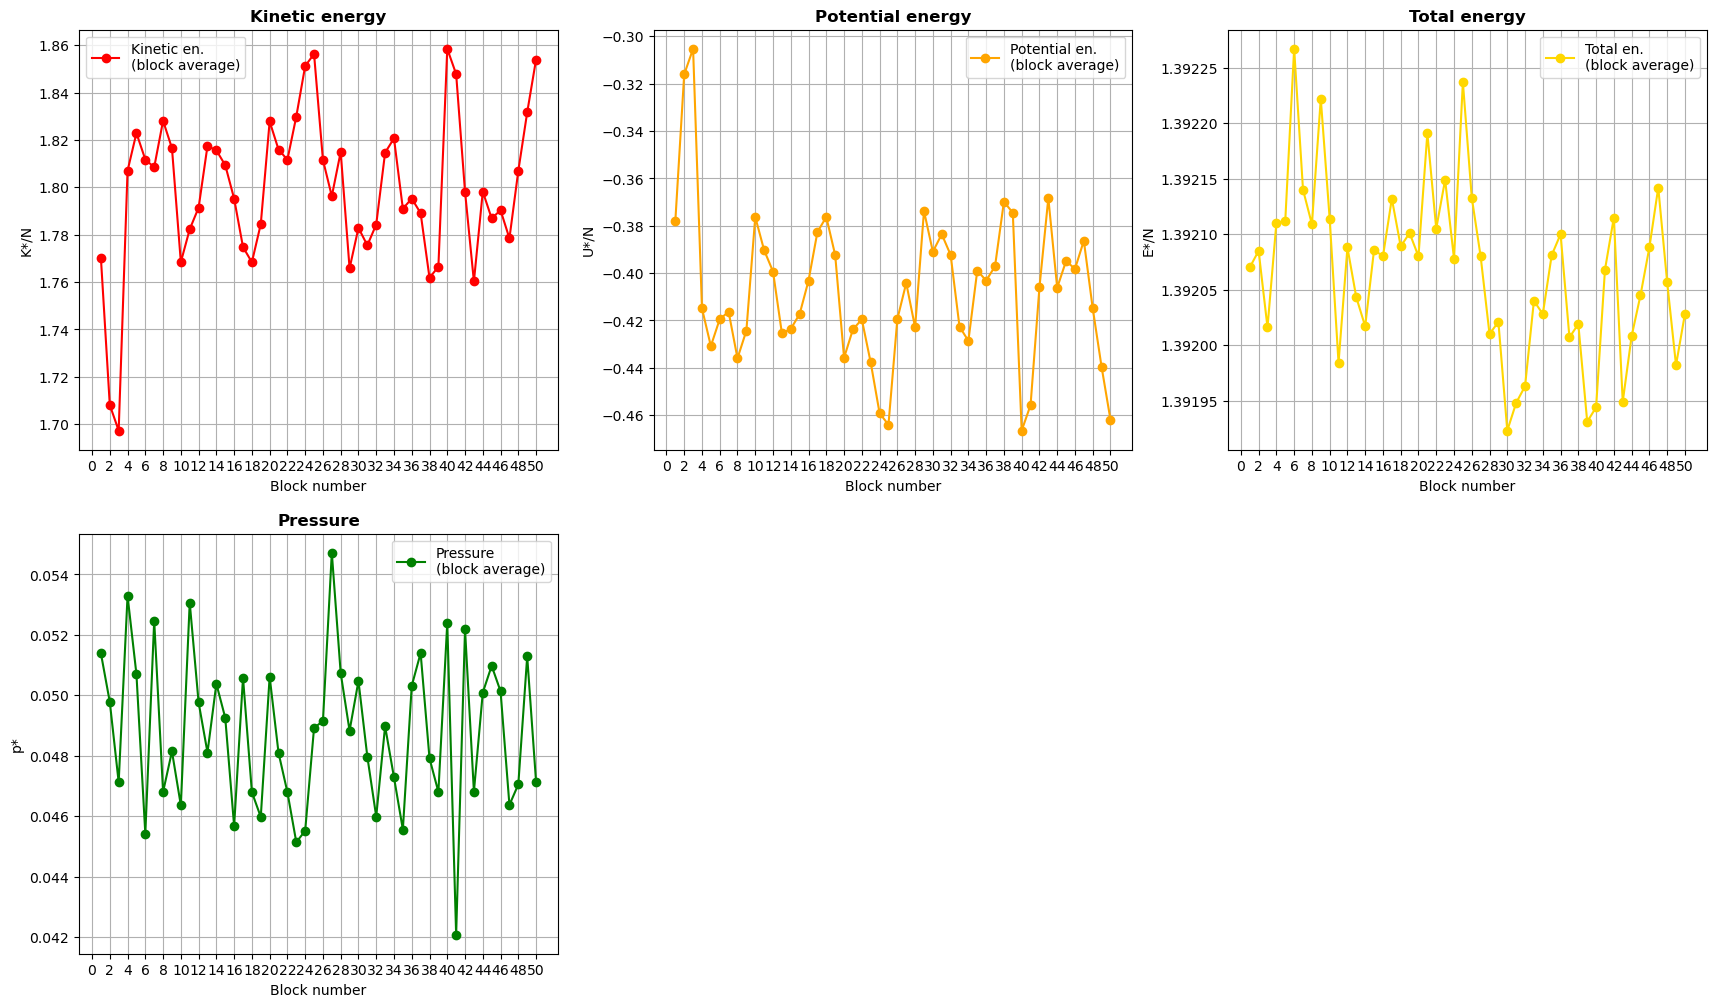

In [23]:
plt.figure(figsize=(21,12))
plt.suptitle("Gas phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Gas/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, label=labels[i], color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
        plt.axhline(y=1.2, color ="r") # desired equilibrium T*
    
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, label=labels[i],color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(0,N+1,2))
plt.axhline(y=1.2, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(21,12))

for i in range(0,4):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Gas/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')
    plt.plot(x, ave, marker='o', label=labels2[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()
plt.show()

## Liquid State

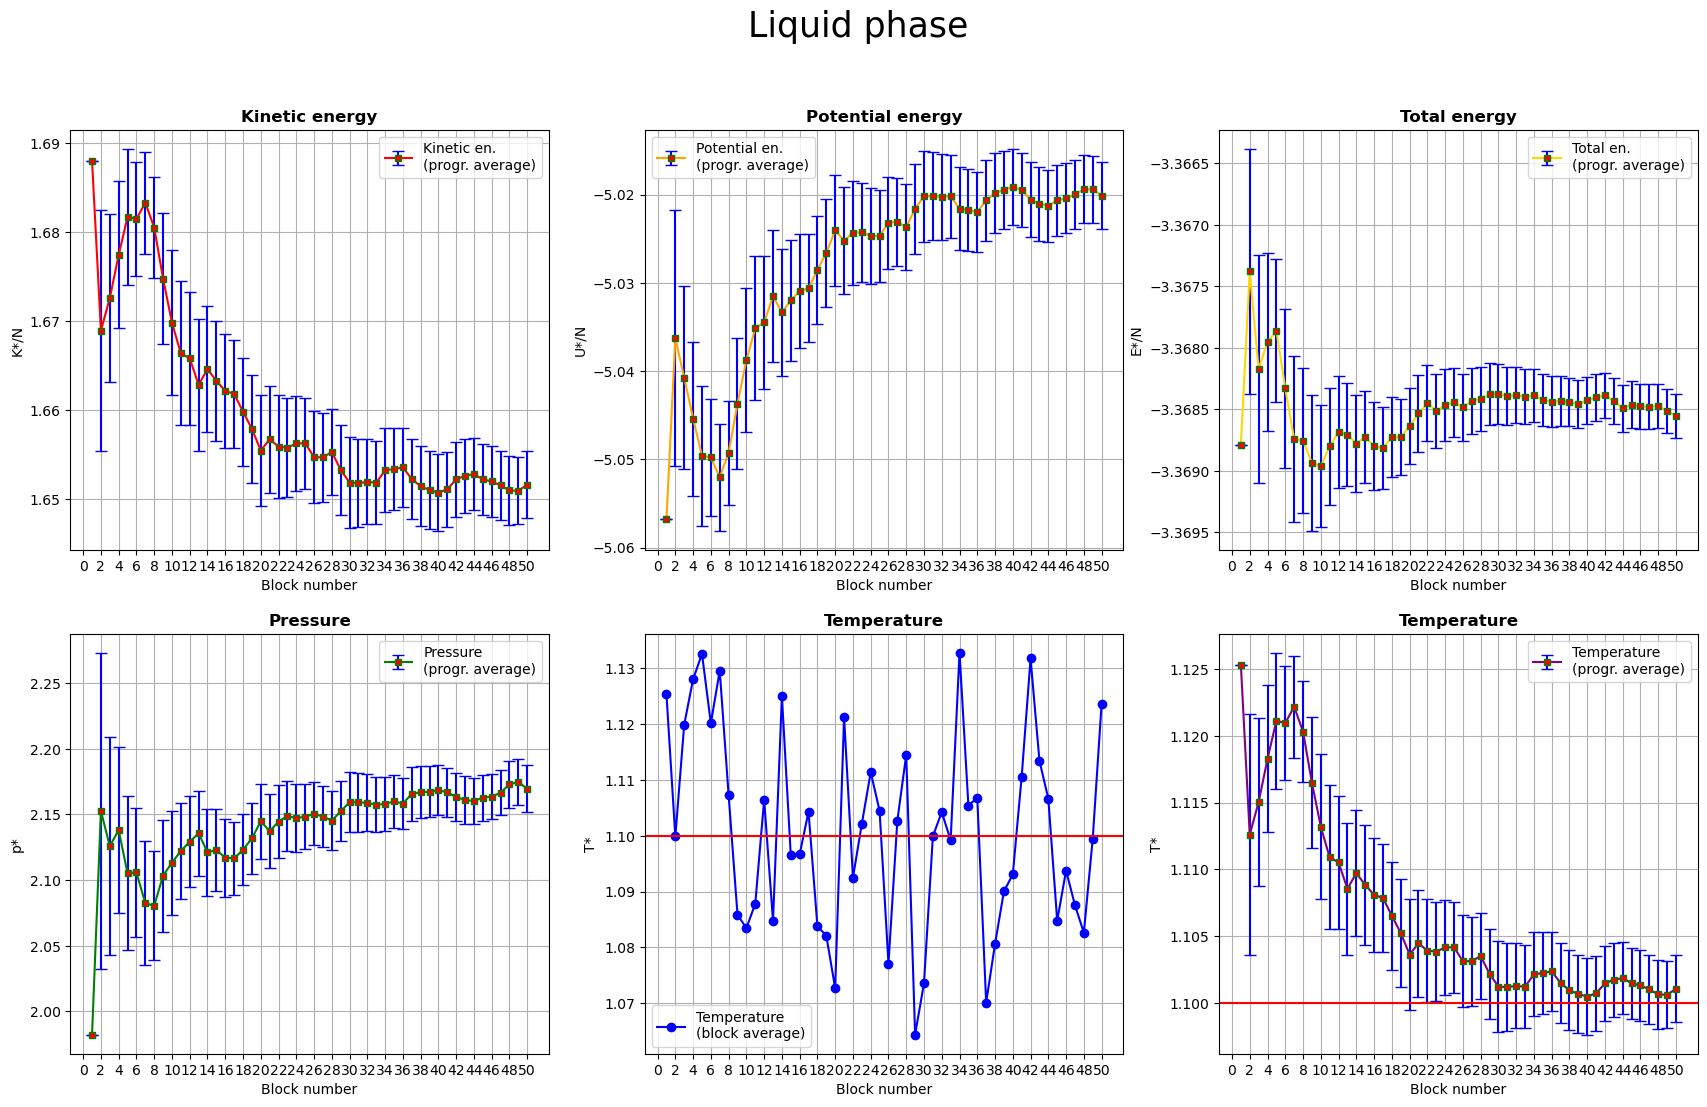

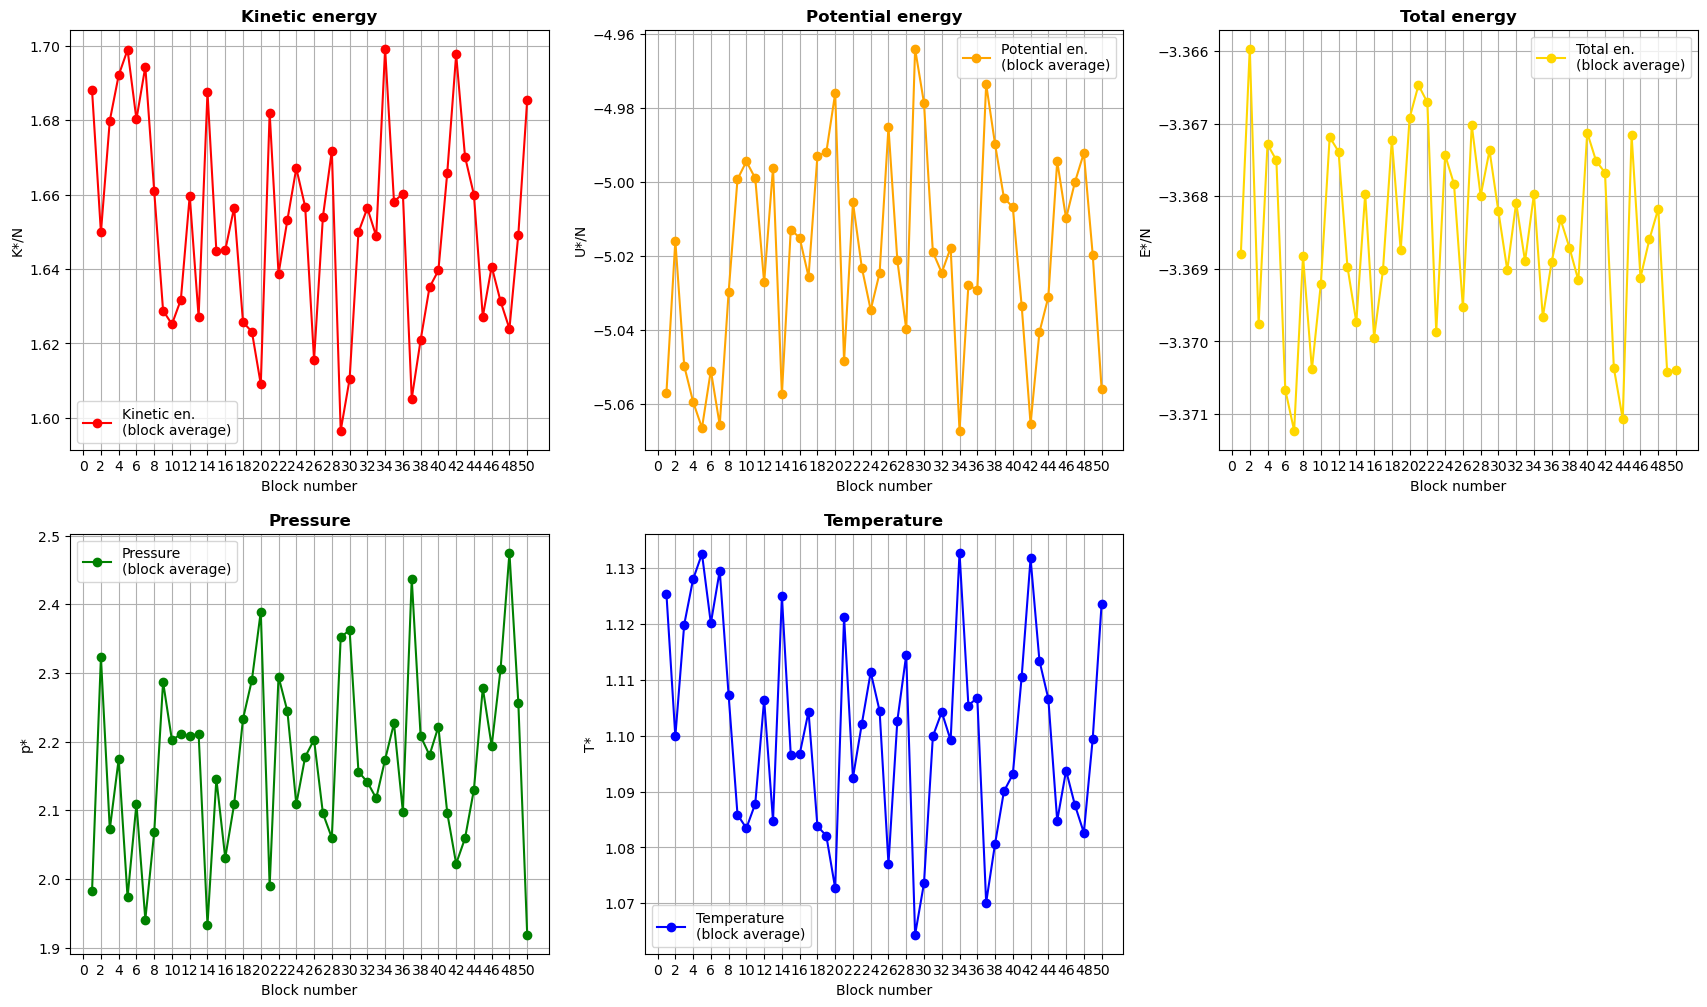

In [24]:
plt.figure(figsize=(21,12))
plt.suptitle("Liquid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Liquid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, label=labels[i], color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
        plt.axhline(y=1.1, color ="r") # desired equilibrium T*
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2))         
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, label=labels[i],color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(0,N+1,2))
plt.axhline(y=1.1, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(21,12))

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Liquid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')
    plt.plot(x, ave, marker='o', label=labels2[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()
plt.show()

## Solid State

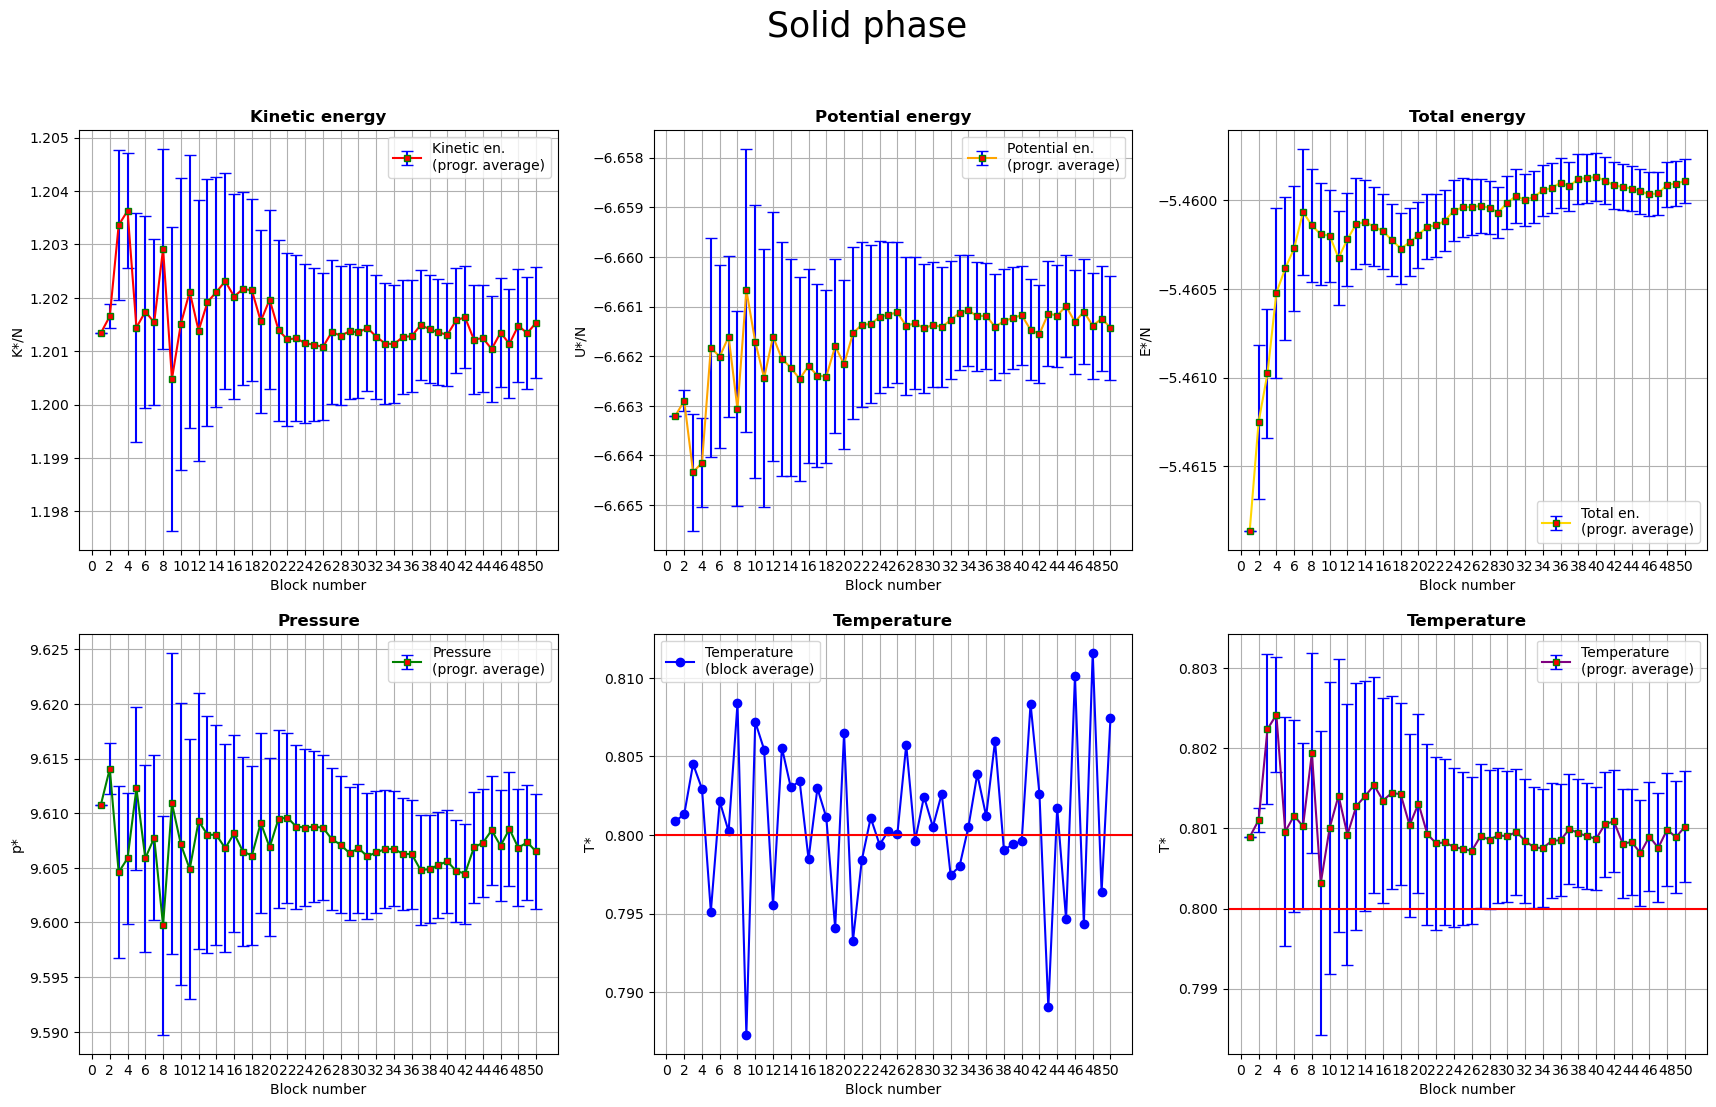

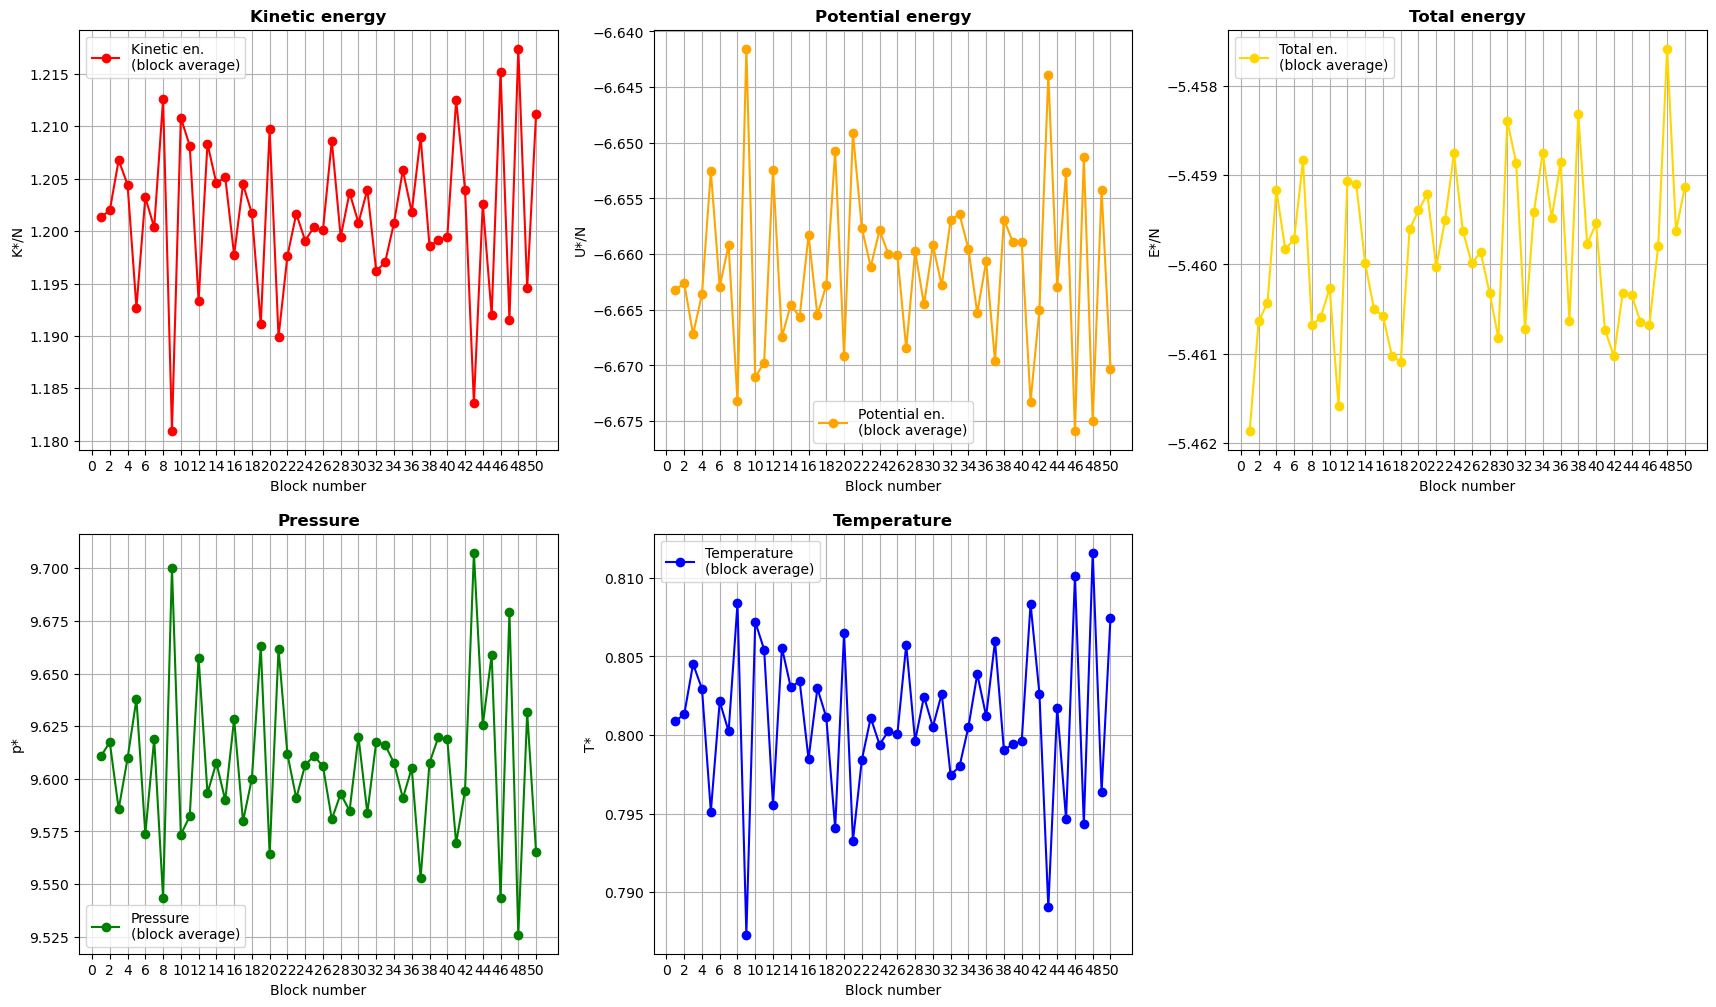

In [26]:
plt.figure(figsize=(21,12))
plt.suptitle("Solid phase", fontsize = 25)

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Solid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')

    if(i!=4):
        plt.errorbar(x, ave_prog, yerr = err, label=labels[i], color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
    if(i==4):
        plt.plot(x, ave, marker='o', label=labels[i], color = colors[i])
        plt.axhline(y=0.8, color ="r") # desired equilibrium T*
    
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2))
    plt.grid(True)
    plt.legend()

i=5
plt.subplot(2,3,i+1)
plt.errorbar(x, ave_prog, yerr = err, label=labels[i],color = colors[i],ecolor='blue', capsize=4,marker='s',mfc='red',mec='green', ms=5, mew=1)
plt.title(titles[i], fontweight='bold')
plt.ylabel(ylabels[i])
plt.xlabel('Block number')
plt.xticks(np.arange(0,N+1,2))
plt.axhline(y=0.8, color ="r") # desired equilibrium T*
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(21,12))

for i in range(0,5):
    
    plt.subplot(2,3,i+1)
    ave, ave_prog, err = np.loadtxt("../DATA/Solid/"+th_var[i]+".dat", usecols=(1,2,3), unpack='true')
    plt.plot(x, ave, marker='o', label=labels2[i], color = colors[i])
    plt.title(titles[i], fontweight='bold')
    plt.ylabel(ylabels[i])
    plt.xlabel('Block number')
    plt.xticks(np.arange(0,N+1,2)) 
    plt.grid(True)
    plt.legend()
plt.show()